In [1]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

Using TensorFlow backend.


In [0]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)


In [4]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))  # 128 -> 512로 실행해도 거의 동일한 결과
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0818 07:30:21.093493 140377533679488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 07:30:21.097083 140377533679488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 07:30:21.108028 140377533679488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 07:30:21.152651 140377533679488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0818 07:30:21.155367 140377533679488 deprecation_wrapp

In [0]:
# 모델 최적화 설정
MODEL_DIR = './model2/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model2/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(
        filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [6]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=40, batch_size=128, verbose=2, 
                    callbacks=[early_stopping_callback,checkpointer])


W0818 07:30:53.867574 140377533679488 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
 - 11s - loss: 0.2578 - acc: 0.9207 - val_loss: 0.0534 - val_acc: 0.9824

Epoch 00001: val_loss improved from inf to 0.05342, saving model to ./model2/01-0.0534.hdf5
Epoch 2/40
 - 4s - loss: 0.0916 - acc: 0.9731 - val_loss: 0.0383 - val_acc: 0.9869

Epoch 00002: val_loss improved from 0.05342 to 0.03830, saving model to ./model2/02-0.0383.hdf5
Epoch 3/40
 - 4s - loss: 0.0696 - acc: 0.9787 - val_loss: 0.0318 - val_acc: 0.9894

Epoch 00003: val_loss improved from 0.03830 to 0.03176, saving model to ./model2/03-0.0318.hdf5
Epoch 4/40
 - 4s - loss: 0.0551 - acc: 0.9835 - val_loss: 0.0343 - val_acc: 0.9886

Epoch 00004: val_loss did not improve from 0.03176
Epoch 5/40
 - 4s - loss: 0.0478 - acc: 0.9846 - val_loss: 0.0300 - val_acc: 0.9907

Epoch 00005: val_loss improved from 0.03176 to 0.02999, saving model to ./model2/05-0.0300.hdf5
Epoch 6/40
 - 4s - loss: 0.0408 - acc: 0.9873 - val_loss: 0.0256 - val_acc: 0.9914

Epoch 00006: v

In [7]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

10000/10000 [==============================] - 1s 65us/step

 Test Accuracy: 0.9912


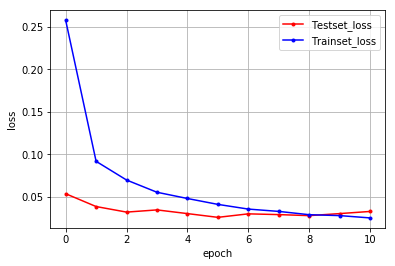

In [8]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
